In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
def plot_permutation(P):
    n = len(P)
    x_values = [i for i in range(n)]
    y_values = P
    plt.scatter(x_values,y_values, label = str(P))

In [5]:
def unrank_permutation(n_list,d):
    n = len(n_list)
    nn_list = [h for h in n_list]
    if d == 0:
        return nn_list
    for k in range(n):
        if d < (k+1)*np.math.factorial(n-1):
            nn_list.remove(n_list[k])
            return [n_list[k]] + unrank_permutation(nn_list,d - k*np.math.factorial(n-1)) 

In [4]:
def relative_order(p):
    '''takes a list of n distinct integers and returns the permutation from 0 to n-1 with the same relative order.'''
    n = len(p)
    SP = sorted(p)
    output = [0]*n
    for i in range(n):
        ind = SP.index(p[i])
        output[i] = ind
    return output

In [5]:
def crossover3(P1,P2):
    n = len(P1)
    child1 = [-1]*n
    child2 = [-1]*n
    r = random.randint(1,n-1)
    for i in range(r):
        child1[i] = P1[i]
        child2[i] = P2[i]
    RO1 = relative_order(P1[r:])
    RO2 = relative_order(P2[r:])
    k = 0
    for i in range(n):
        if i not in child1:
            child1[r+RO2.index(k)] = i
            k = k+1
    k=0
    for i in range(n):
        if i not in child2:
            child2[r+RO1.index(k)] = i
            k = k+1
    return [child1,child2]

In [6]:
def mut1(Perm,r1,r2):
    n = len(Perm)
    output = [i for i in Perm]
    if r1 == r2:
        return(Perm)
    output[r1+1]=Perm[r2]
    for i in range(r1+2,r2+1):
        output[i] = Perm[i-1]
    return output

def mutation1(Perm):
    n = len(Perm)
    r1 = random.randint(0,n-1)
    r2 = random.randint(0,n-1)
    if r1<=r2:
        return mut1(Perm,r1,r2)
    else:
        REV = [Perm[n-1-j] for j in range(n)]
        output = mut1(REV,r2,r1)
        return [output[n-1-j] for j in range(n)]

In [11]:
def count_2413(permutation):
    P = permutation
    n = len(P)
    C = 0
    for i in range(n-3):
        for j in range(i+1,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for l in range(k+1,n):
                            if P[l] < P[j] and P[l]>  P[i]:
                                C = C+1
    return C

In [60]:
def count_2413_DC(permutation,mm):
    n = len(permutation)
    P = permutation
    if n < 25:
        return count_2413(permutation)
    m = int(n*mm)
    P1 = permutation[:m]
    P2 = permutation[m:]
    C1 = count_2413_DC(P1,mm)
    C2 = count_2413_DC(P2,mm)
    count = 0
    for i in range(m):
        for j in range(m,n-2):
            if P[i] < P[j]:
                for k in range(j+1,n-1):
                    if P[k] < P[i]:
                        for ell in range(k+1,n):
                            if P[ell] < P[j] and P[ell] > P[i]:
                                count = count + 1
        if i < m-1:
            for j in range(i+1,m):
                if P[i] < P[j]:
                    for k in range(m,n-1):
                        if P[k] < P[i]:
                            for ell in range(k+1,n):
                                if P[ell] < P[j] and P[ell] > P[i]:
                                    count = count + 1
                    if j < m-1:
                        for k in range(j+1,m):
                            if P[k] < P[i]:
                                for ell in range(m,n):
                                    if P[ell] < P[j] and P[ell] > P[i]:
                                        count = count + 1
    return count + C1 + C2
                

In [38]:
r = random.randint(0,np.math.factorial(300))
UR = unrank_permutation([i for i in range(300)],r)
print(r,UR)

18076767635721341049753402293339040403926199045660766219358094940813477011903876432711628912254939878124416847525162701754716631672407121911255451105211112522561844450750162362604264881096358400582717200083849548769446026102286948673528956871488651815086484200404900214124494010234839189700976598239637946347236086763063122958647258792594410559638803484352162937261962032775794514968173771841888316278838007625972110581146667779182159305268579889279397746017455893461154980867418638712196710946089148939837177112443352351891243357813558273094003820116140406856834343184813140084154954256846006283630408400383369513 [17, 215, 293, 159, 8, 198, 151, 208, 70, 272, 142, 87, 230, 63, 137, 155, 18, 214, 164, 156, 248, 119, 266, 31, 42, 94, 269, 58, 251, 157, 282, 92, 299, 203, 297, 54, 53, 7, 273, 182, 234, 128, 104, 220, 162, 237, 2, 191, 106, 91, 126, 202, 227, 189, 226, 65, 291, 263, 52, 224, 277, 147, 64, 103, 118, 267, 186, 254, 284, 296, 292, 61, 139, 84, 0, 261, 109, 219, 80, 114, 242, 290, 2

In [39]:
import time

In [45]:
start = time.time()
for i in range(50):
    r = random.randint(0,np.math.factorial(100))
    UR = unrank_permutation([i for i in range(100)],r)
    count_2413(UR)
print(r)
end = time.time()
print(end-start)

13973678409468221161493184190845607148344119363383911089756953384195645345926005075619417819914891804305124443808556033094588293092399062997135898124711545185
3.289280891418457


In [62]:
times = []
for j in range(1,20):
    m_thing = j/20
    start = time.time()
    for i in range(10):
        r = random.randint(0,np.math.factorial(300))
        UR = unrank_permutation([i for i in range(300)],r)
        count_2413_DC(UR,m_thing)
    print(r)
    end = time.time()
    times = times + [end-start]
print(times)
start = time.time()
for i in range(10):
    r = random.randint(0,np.math.factorial(300))
    UR = unrank_permutation([i for i in range(300)],r)
    count_2413(UR)
print(r)
end = time.time()
print(end-start)

295450331664214100713090846082387832195812812313477868158043023547305232006505941044450482356601323650688222910776392220864923308422788656776805507785719496681058472852886900041823376121649101946976489542385098693282972370043991879528709679059925888439091246117196388324966418392249820473678697069886403661801915110249480496166000719144104416716784598894996057524421006285355562795691438006915665205095286224236311266243368688119182627980268699664119223033556624112006107399229607464489668946854723486616059270964645363438848875420714494477174534756657371213153050020963124077399837500916999001320432213141594960854
932503865740395393452686172722927266056011218342117868329715266897676308658959662020795009707483687685150762776033813719652047873361897588529163522609400405418600901845280178475508638073674889535216641885275732212678062385724054632641420844207317999110875651285443501325985751942952430520951101554838135854305573571904651744245114867673224341778607809727482340386963445568202998891530

61823034700112175867002788608626677690603394091760303345370288134052998712546676621008081488138866068084547326381600985631601446507497747301851001135926488692849423831654263331186134936799213959739238262238133378932140026894446784067261961831590783879498674929330672465542029082075812610763548314505738629642324807543128909913591776339131087193700224856607182876415550077367810226714057615093635117048578336501983965010940836850714129536154536308277077130498016601245334456518353514299871648254990391608958084908367859842762420662111631943546234274269555761066723817056207247504042571072917953287358004593125446944
2847969750589620174593404858563203127803227116812550744536088763669547746268660367665015757871146315233234245410203356333036464501882305953144701901895498234487839035025937266149843608034737228393265878341418227306036011004197569910104454609536266553262573756401166916959485663597203093870477723634105361659056097147219009358442651210450114729816671689768637763014480045036819860069896

In [15]:
def Evolutionary_Algorithm2_2413(n):
    #initialize population and compute fitness for each individual
    POP = []
    for j in range(30000):
        r = random.randint(0,np.math.factorial(n)-1)
        P = unrank_permutation([i for i in range(n)],r)
        fitness = count_2413(P)
        POP = POP + [[fitness,P]]
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,120)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:30000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

In [18]:
def Evolutionary_Algorithm2_2413_POP(n,POP):
    #initialize population and compute fitness for each individual
    #sort initial population from most fit to least fit.
    POP.sort()
    POP.reverse()
    #initialize a counter for fitness evaluations
    fe = 0
    #start the loop
    while(fe<200001):
        #randomly select 5 from the pop
        randomset = random.sample(POP,120)
        #select the top 2 out of 5 for parents and crossover
        randomset.sort()
        P1 = randomset[-1]
        P2 = randomset[-2]
        [child1,child2] = crossover3(P1[1],P2[1])
        #apply mutation to the offspring at a 80% mutation rate
        mr = random.random()
        while mr < 0.8:
            child1 = mutation1(child1)
            child2 = mutation1(child2)
            mr = random.random()
        #compute fitness for each child and increment the fitness evaluation counter
        fitness1 = count_2413(child1)
        fitness2 = count_2413(child2)
        fe = fe+2
        #include the offspring into the population, resort and delete the 2 weakest individuals.
        POP = POP + [[fitness1,child1]]
        POP = POP + [[fitness2,child2]]
        POP.sort()
        POP.reverse()
        POP = POP[:30000]
        if fe % 10000 == 0:
            print([fe],[POP[j][0] for j in range(10)],[POP[-1][0]])
            plot_permutation(POP[0][1])
            plt.show()
    return POP

[10000] [64119, 63943, 63467, 63466, 63461, 62986, 62951, 62928, 62918, 62891] [26494]


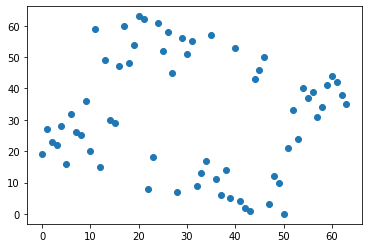

[20000] [67948, 67822, 67738, 67660, 67619, 67599, 67595, 67490, 67363, 67343] [35483]


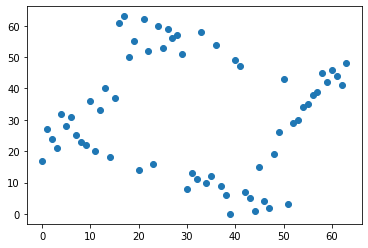

[30000] [69859, 69773, 69570, 69510, 69455, 69450, 69444, 69427, 69427, 69415] [56016]


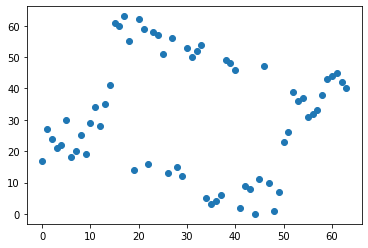

[40000] [70869, 70824, 70811, 70809, 70801, 70786, 70775, 70768, 70738, 70722] [62047]


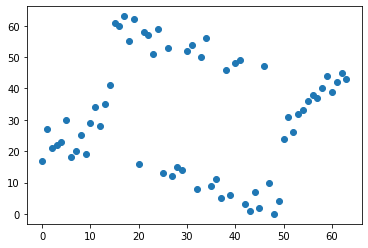

[50000] [71557, 71548, 71547, 71547, 71542, 71535, 71515, 71474, 71464, 71459] [64975]


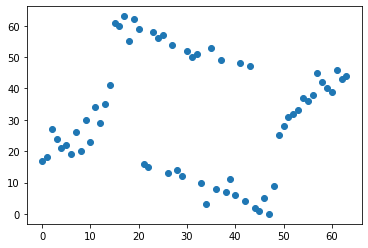

[60000] [72315, 72046, 72045, 72030, 72025, 72008, 71990, 71978, 71976, 71975] [66907]


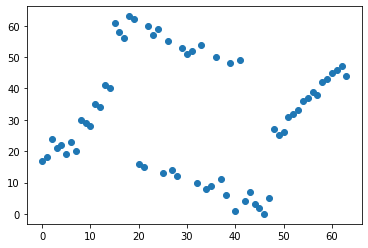

[70000] [72455, 72413, 72397, 72394, 72380, 72377, 72373, 72373, 72372, 72372] [68292]


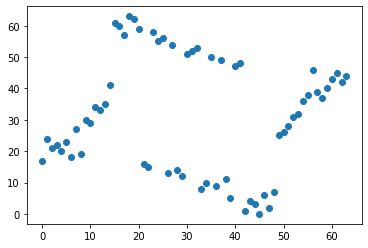

[80000] [72608, 72600, 72593, 72592, 72591, 72591, 72582, 72582, 72578, 72578] [69360]


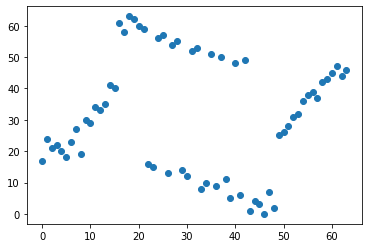

[90000] [72713, 72709, 72709, 72709, 72709, 72709, 72709, 72708, 72708, 72707] [70183]


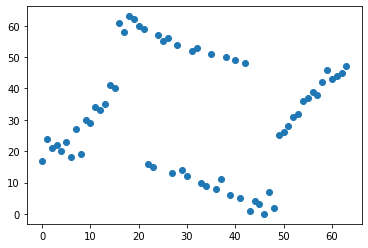

[100000] [72784, 72782, 72774, 72774, 72774, 72774, 72774, 72774, 72773, 72773] [70783]


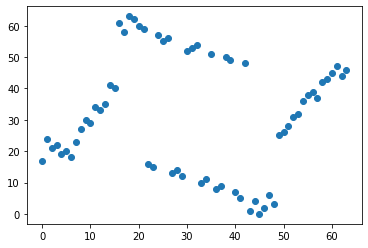

[110000] [72815, 72805, 72793, 72793, 72792, 72792, 72792, 72790, 72789, 72789] [71223]


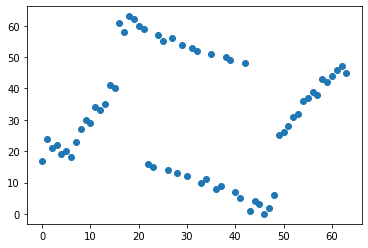

[120000] [72832, 72830, 72830, 72830, 72830, 72827, 72827, 72827, 72827, 72826] [71588]


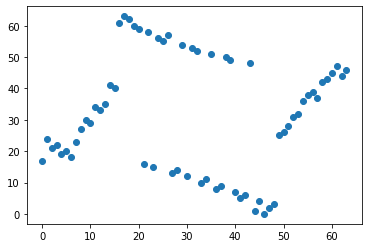

[130000] [72860, 72854, 72854, 72854, 72854, 72854, 72854, 72854, 72854, 72854] [71883]


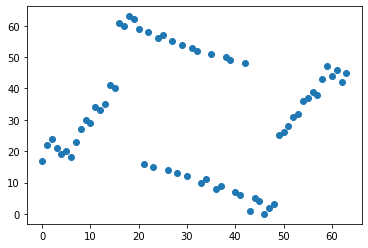

[140000] [72864, 72862, 72862, 72862, 72862, 72862, 72862, 72861, 72861, 72861] [72136]


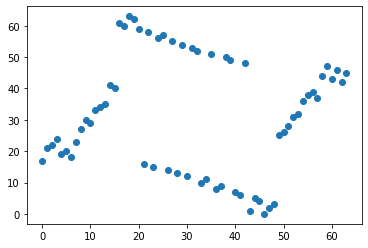

[150000] [72872, 72872, 72872, 72872, 72872, 72872, 72872, 72872, 72872, 72872] [72349]


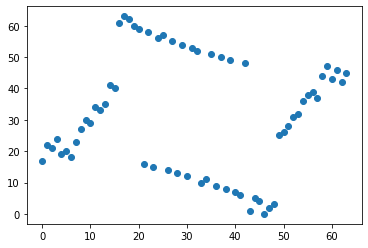

[160000] [72888, 72883, 72882, 72882, 72882, 72882, 72881, 72881, 72881, 72881] [72502]


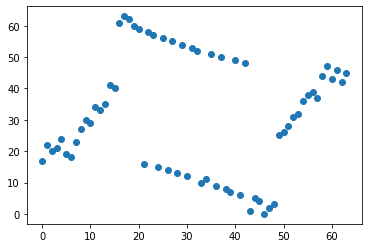

[170000] [72894, 72894, 72894, 72893, 72893, 72893, 72893, 72893, 72893, 72893] [72613]


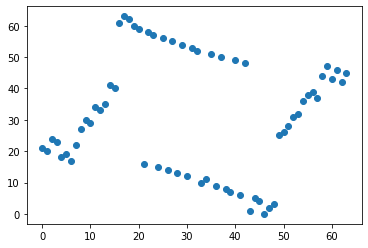

[180000] [72895, 72895, 72895, 72895, 72895, 72895, 72895, 72895, 72895, 72895] [72703]


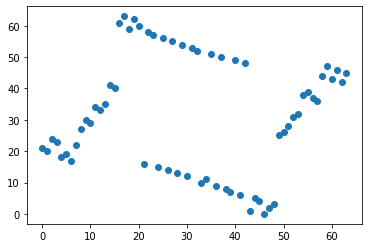

[190000] [72897, 72897, 72897, 72897, 72897, 72897, 72897, 72897, 72897, 72896] [72761]


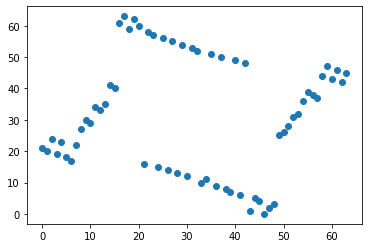

[200000] [72909, 72909, 72909, 72909, 72908, 72908, 72908, 72908, 72908, 72908] [72788]


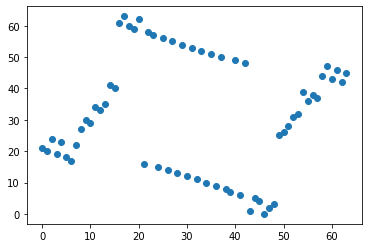

In [11]:
EA64 = Evolutionary_Algorithm2_2413(64)

[10000] [72909, 72909, 72909, 72909, 72909, 72909, 72909, 72909, 72909, 72909] [72817]


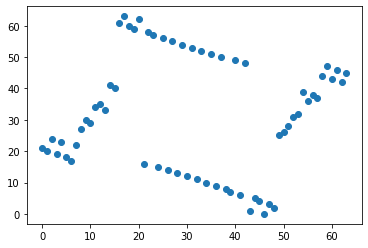

[20000] [72910, 72910, 72910, 72910, 72910, 72910, 72910, 72909, 72909, 72909] [72841]


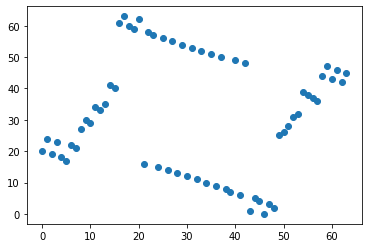

[30000] [72911, 72910, 72910, 72910, 72910, 72910, 72910, 72910, 72910, 72910] [72857]


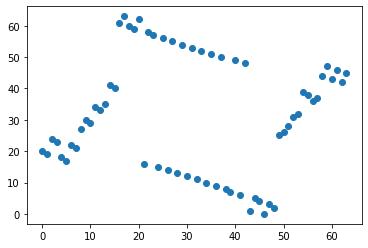

[40000] [72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911] [72866]


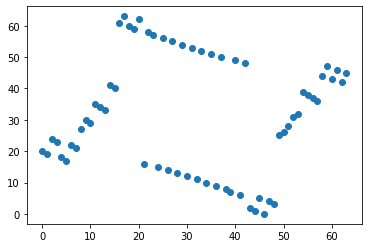

[50000] [72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911] [72872]


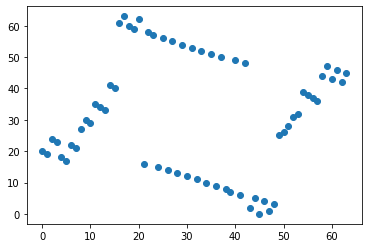

[60000] [72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911, 72911] [72888]


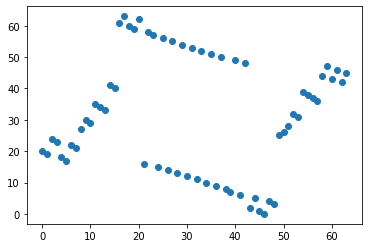

[70000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72893]


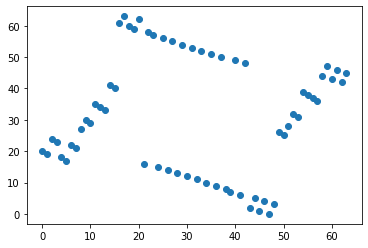

[80000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72895]


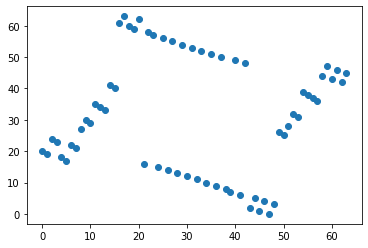

[90000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72897]


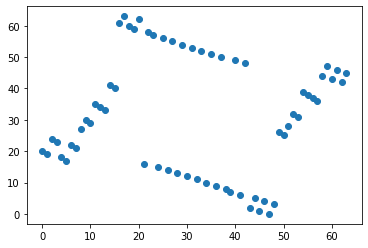

[100000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72908]


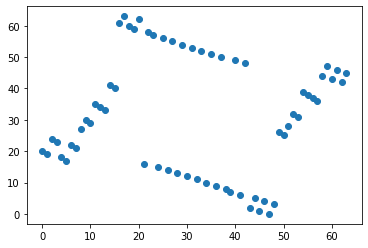

[110000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72909]


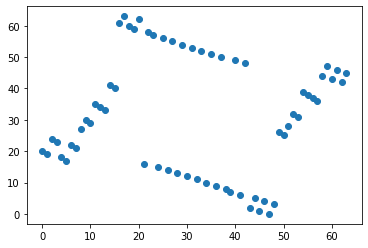

[120000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72909]


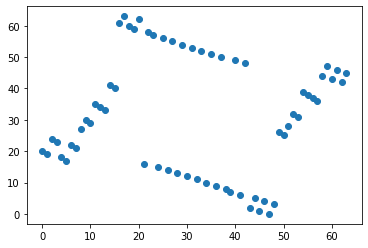

[130000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72910]


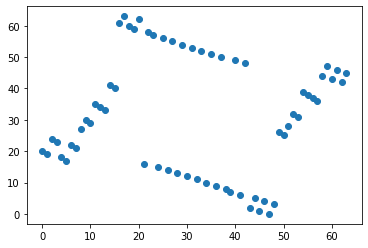

[140000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72911]


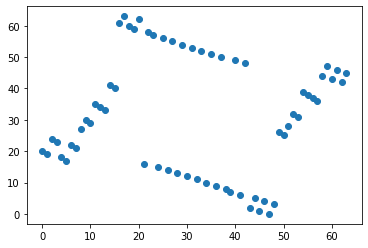

[150000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72911]


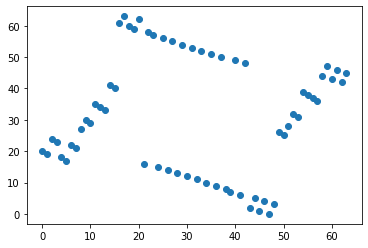

[160000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72911]


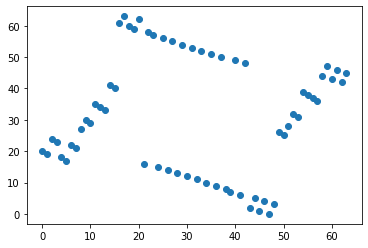

[170000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72912]


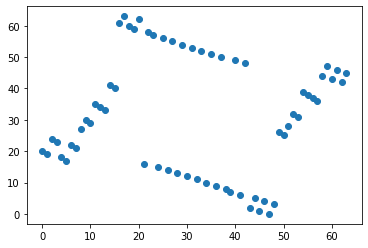

[180000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72912]


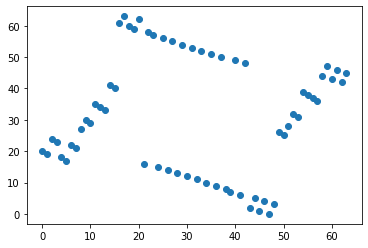

[190000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72912]


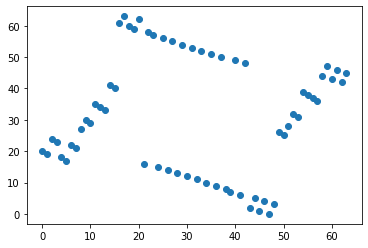

[200000] [72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912, 72912] [72912]


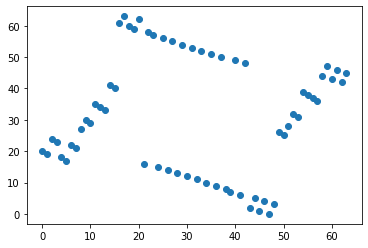

In [13]:
EA64_2 = Evolutionary_Algorithm2_2413_POP(64,EA64)

[10000] [3243, 3226, 3215, 3207, 3197, 3197, 3195, 3193, 3187, 3179] [994]


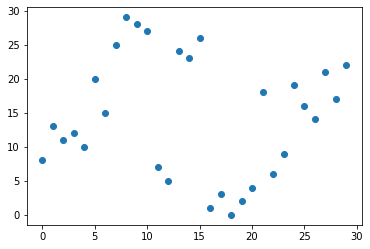

[20000] [3362, 3356, 3354, 3350, 3343, 3335, 3332, 3328, 3328, 3324] [1270]


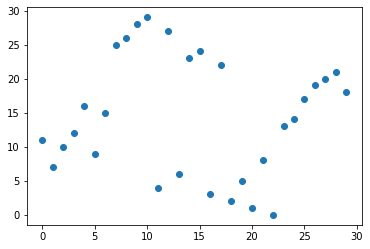

[30000] [3444, 3444, 3444, 3428, 3428, 3428, 3428, 3425, 3417, 3414] [1735]


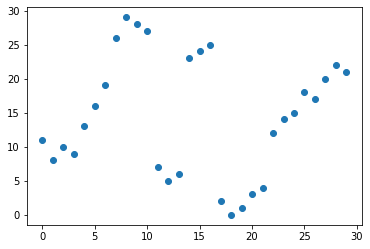

[40000] [3454, 3447, 3445, 3444, 3444, 3444, 3444, 3444, 3444, 3444] [2471]


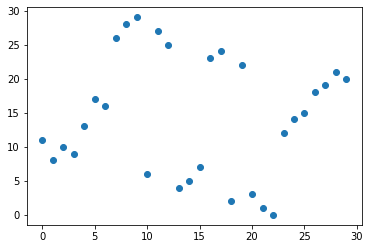

[50000] [3473, 3470, 3466, 3466, 3466, 3466, 3463, 3463, 3461, 3461] [2788]


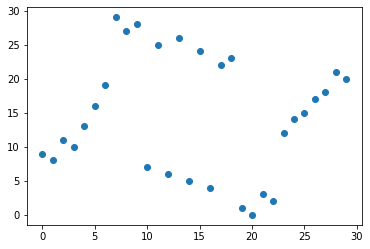

[60000] [3482, 3481, 3480, 3480, 3480, 3480, 3480, 3480, 3480, 3480] [2972]


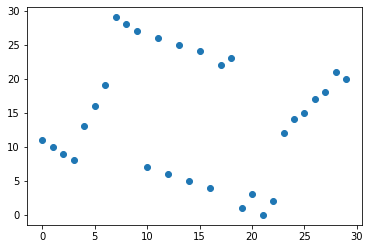

[70000] [3488, 3486, 3486, 3486, 3485, 3483, 3482, 3482, 3482, 3482] [3090]


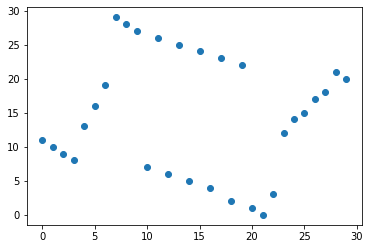

[80000] [3494, 3494, 3494, 3494, 3494, 3494, 3494, 3494, 3494, 3494] [3172]


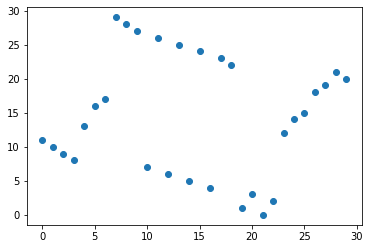

[90000] [3499, 3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498, 3498] [3234]


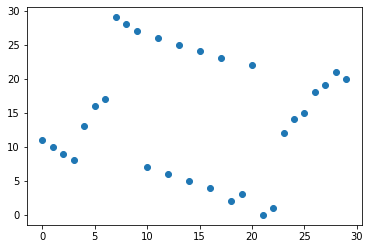

[100000] [3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503] [3283]


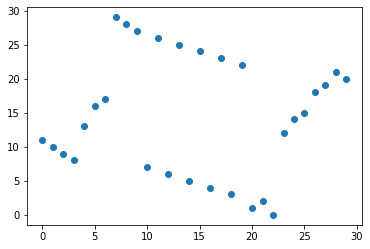

[110000] [3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503, 3503] [3321]


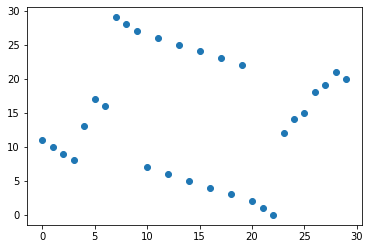

[120000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3503] [3355]


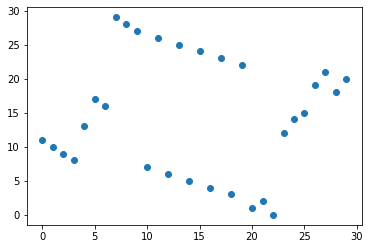

[130000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3385]


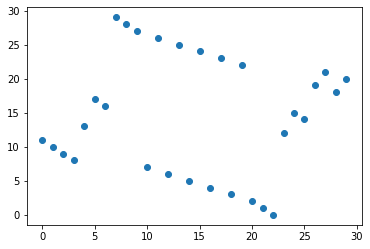

[140000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3410]


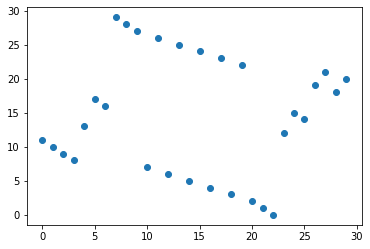

[150000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3431]


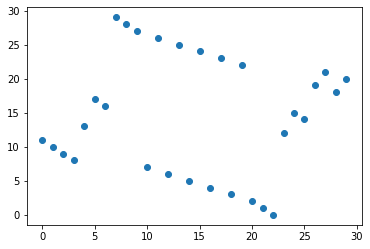

[160000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3444]


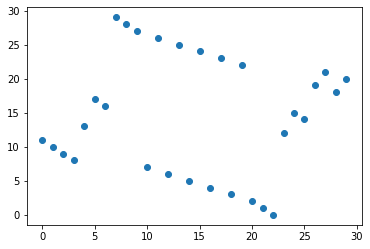

[170000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3459]


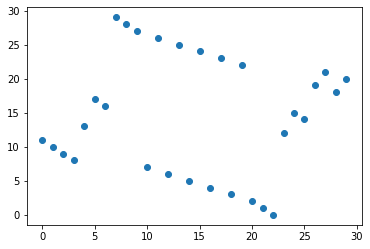

[180000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3465]


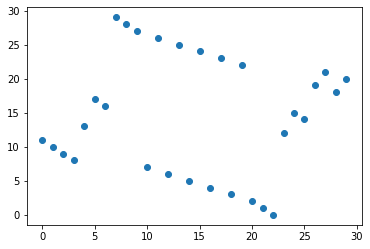

[190000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3475]


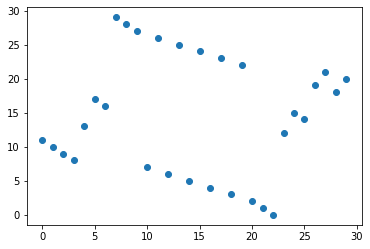

[200000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3482]


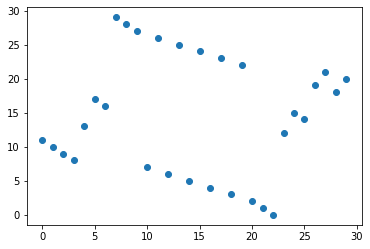

In [17]:
EA64 = Evolutionary_Algorithm2_2413(30)

[10000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3486]


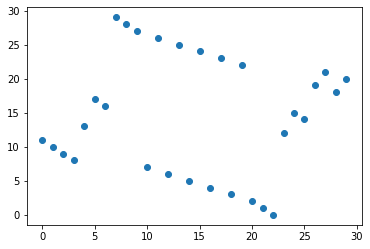

[20000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3494]


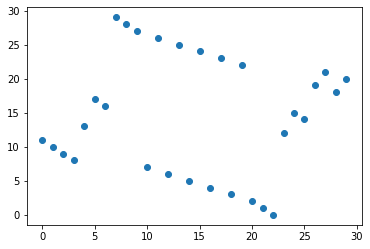

[30000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3498]


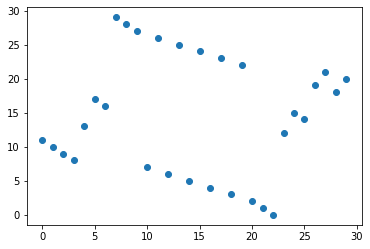

[40000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3503]


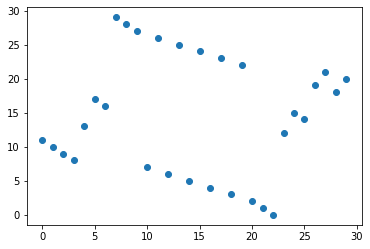

[50000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3503]


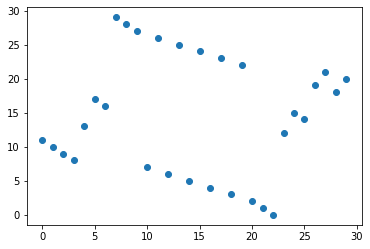

[60000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3503]


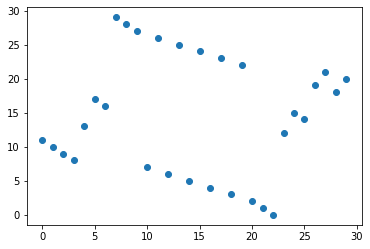

[70000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


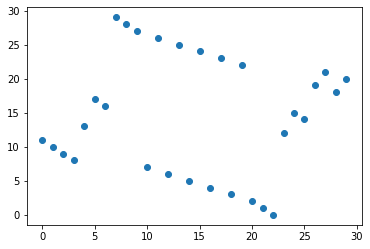

[80000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


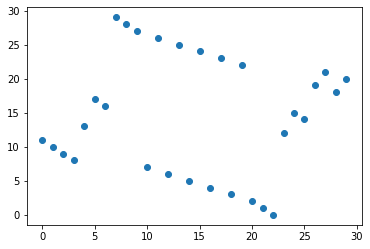

[90000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


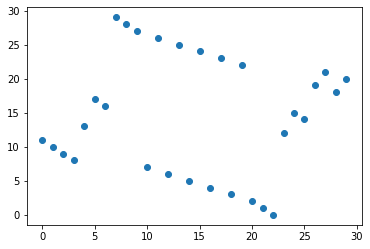

[100000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


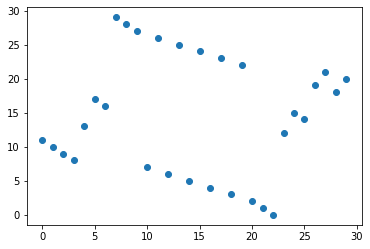

[110000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


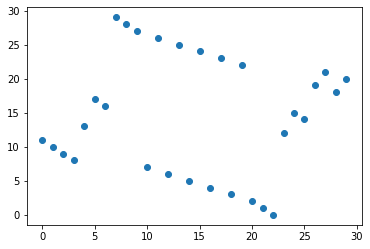

[120000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


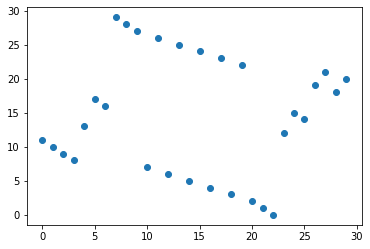

[130000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


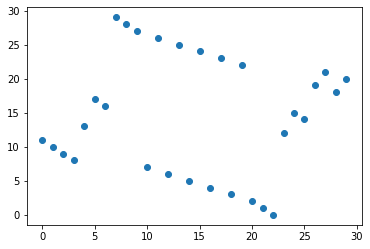

[140000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


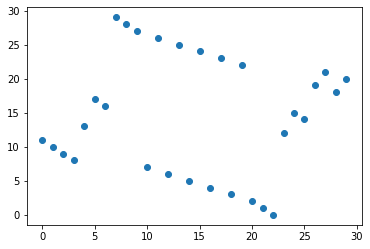

[150000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


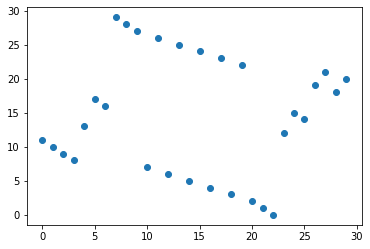

[160000] [3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


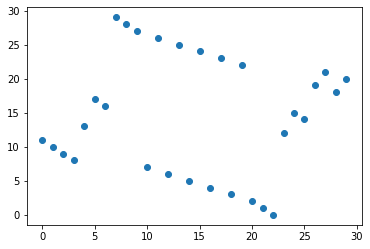

[170000] [3506, 3506, 3504, 3504, 3504, 3504, 3504, 3504, 3504, 3504] [3504]


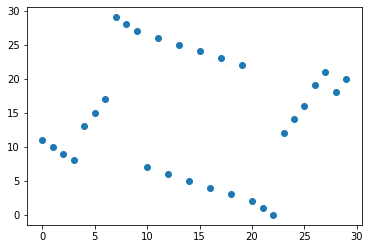

[180000] [3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506] [3504]


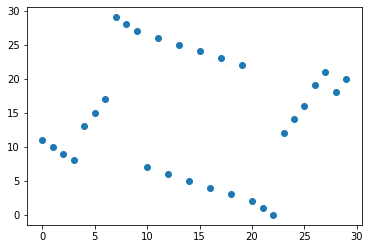

[190000] [3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506] [3504]


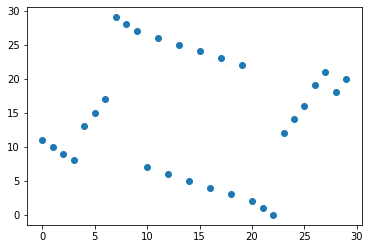

[200000] [3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506, 3506] [3504]


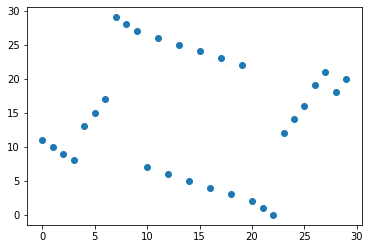

In [19]:
EA30_2 = Evolutionary_Algorithm2_2413_POP(30,EA64)